## **Airbnb (New York City)**
* 미국 NYC Airbnb 목록(2019)
* 프로젝트 목적: 가격 예측(price)
* 제공 데이터(3개): train.csv, test.csv, y_test(최종 채점용)
* 평가 방식: MSE (평균제곱오차/ 실제 값과 예측 값 차이 ->제곱해 평균)

### **1. Baseline**
#### **라이브러리와 데이터 불러오기**

In [1]:
# 필요한 라이브러리 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터 불러오기
train = pd.read_csv('/aiffel/data/train.csv')
test = pd.read_csv('/aiffel/data/test.csv')

### **2. EDA (탐색적 데이터 분석)**
#### **탐색적으로 데이터 살펴보기**

In [3]:
# 데이터 크기
train.shape, test.shape

((39116, 16), (9779, 15))

train data에 target 값이 하나 더 추가되어 있다.

In [4]:
# 데이터 샘플
display(train.head(2))
display(test.head(2))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,2019-01-01,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,2019-06-30,1.68,2,262


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,30913224,"Cozy and Sunny Room Williamsburg, Luxury Building",33771081,Rémy,Brooklyn,Williamsburg,40.70959,-73.94652,Private room,3,2,2019-05-08,0.31,1,0
1,971247,Sunny Artist Live/Work Apartment,5308961,Larry,Manhattan,Upper West Side,40.79368,-73.96487,Entire home/apt,3,159,2019-07-03,2.09,1,244


In [5]:
# 데이터 타입
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39104 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39099 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   price                           39116 non-null  int64  
 10  minimum_nights                  39116 non-null  int64  
 11  number_of_reviews               39116 non-null  int64  
 12  last_review                     

**결측치 확인하기**

In [6]:
# 결측치(train)
train.isnull().sum()

id                                   0
name                                12
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       7994
reviews_per_month                 7994
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [7]:
# 결측치(test)
test.isnull().sum()

id                                   0
name                                 4
host_id                              0
host_name                            4
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       2058
reviews_per_month                 2058
calculated_host_listings_count       0
availability_365                     0
dtype: int64

동일한 피처에 결측치가 있는 것을 확인할 수 있다.

#### **데이터 시각화하기**

**상관관계(correlation) 확인하기**

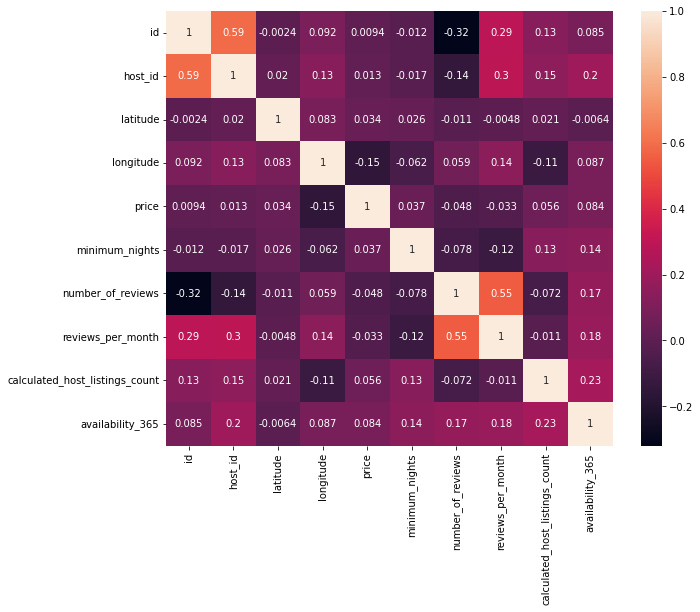

In [8]:
plt.subplots(figsize=(10, 8))
sns.heatmap(train.corr(), annot=True);

상관관계 표를 보면 가격과 다른 특성 간에 강한 관계가 없음을 알 수 있다.

**히스토그램으로 분포 파악하기**

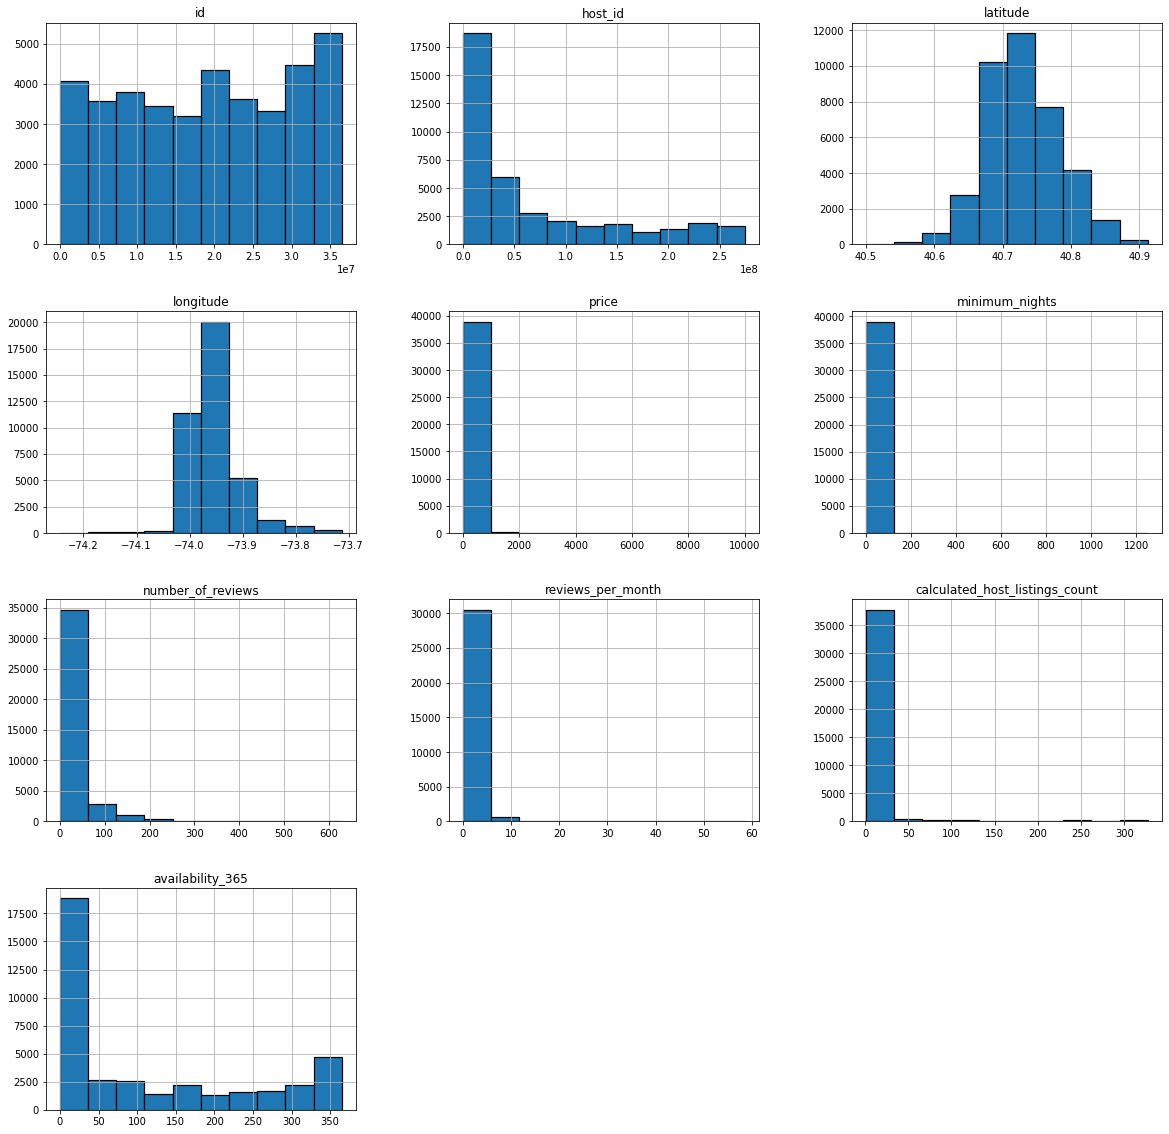

In [9]:
train.hist(edgecolor="black", linewidth=1.2, figsize=(20, 20));

Target인 price는 조금 더 크게 시각화해서 자세하게 살펴보자!

Text(0.5, 1.0, 'Price Distribution Plot')

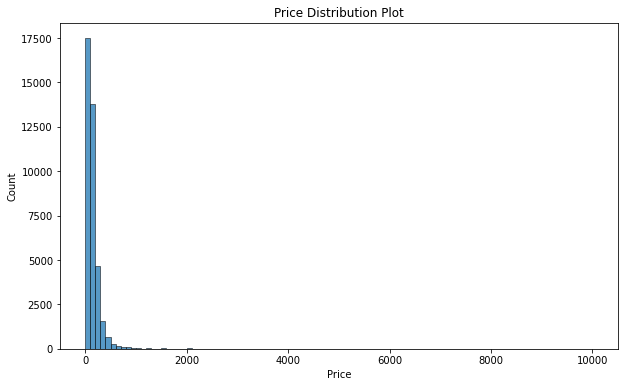

In [10]:
# target(hist)
plt.figure(figsize=(10, 6))
sns.histplot(train['price'], bins=100)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Price Distribution Plot")

좌측에 많이 몰려있는 것을 확인할 수 있어 로그 변환(log transformation)을 통해 데이터 분포를 정규분포에 가깝게 만들기로 했다.

**범주형(categorical) 데이터**

In [11]:
# 피처(neighbourhood_group)
train['neighbourhood_group'].value_counts()

Manhattan        17331
Brooklyn         16081
Queens            4530
Bronx              884
Staten Island      290
Name: neighbourhood_group, dtype: int64

In [12]:
# 피처(room_type)
train['room_type'].value_counts()

Entire home/apt    20299
Private room       17876
Shared room          941
Name: room_type, dtype: int64

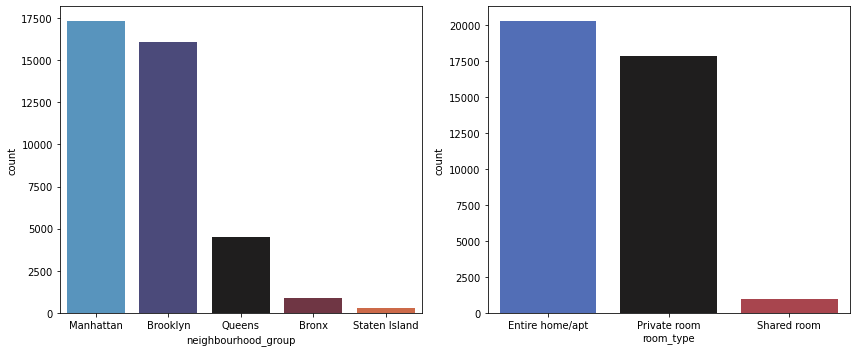

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(ax=axes[0], data=train, x='neighbourhood_group', palette='icefire', order=train['neighbourhood_group'].value_counts().index)
sns.countplot(ax=axes[1], data=train, x='room_type', palette='icefire', order=train['room_type'].value_counts().index)
plt.tight_layout()
plt.show()

Manhattan과 Brooklyn에 가장 많은 사람들이 예약하는 것을 알 수 있으며, 대부분 공유 룸보다는 집 전체나 개인 방을 예약하는 것으로 보인다.

In [14]:
# 피처(neighbourhood)
train['neighbourhood'].value_counts()

Williamsburg          3099
Bedford-Stuyvesant    2953
Harlem                2114
Bushwick              1981
Hell's Kitchen        1557
                      ... 
Silver Lake              1
Richmondtown             1
Willowbrook              1
New Dorp                 1
Fort Wadsworth           1
Name: neighbourhood, Length: 221, dtype: int64

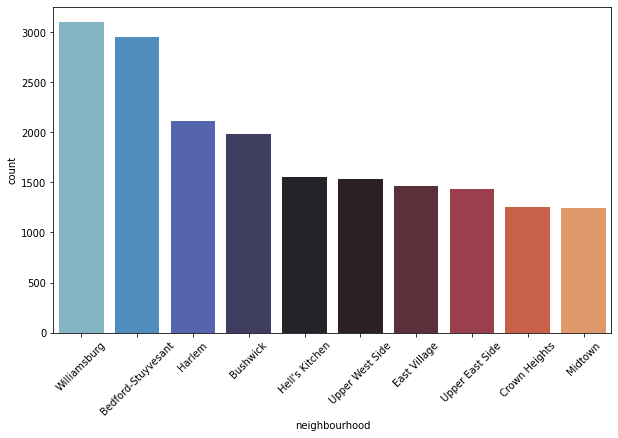

In [15]:
fig, axes = plt.subplots(figsize=(10, 6))
top_neighbourhood = train['neighbourhood'].value_counts().iloc[:10].index
sns.countplot(data=train[train['neighbourhood'].isin(top_neighbourhood)], x='neighbourhood', palette='icefire', order=top_neighbourhood)
plt.xticks(rotation=45)
plt.show()

Williamsburg, Brooklyn에서 예약이 가장 많이 발생하는 것을 알 수 있다.

이번에는 위도(latitude)와 경도(longitude) 값을 산점도로 나타내어 각 지역별 분포를 살펴보자.

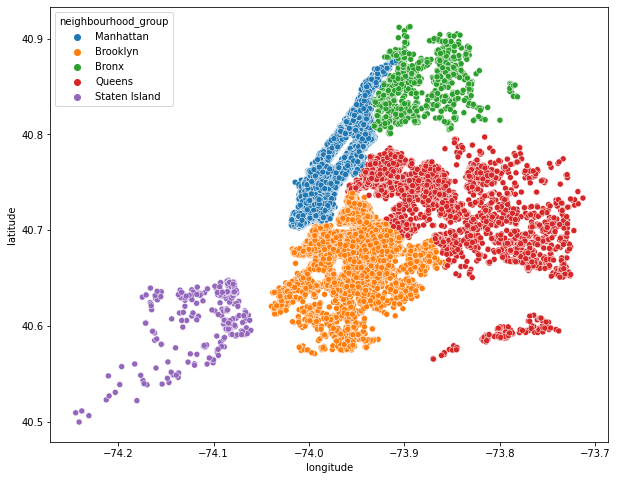

In [16]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', data=train)
plt.show()

### **3. 데이터 전처리**
#### **데이터를 살펴보고 판단하여 결측치 및 이상치를 처리**

로그 변환을 진행하기 전에, describe()함수를 통해 최솟값을 확인해준다. (로그 함수는 0 이하의 값을 계산할 수 없기 때문이다)

In [17]:
train['price'].describe()

count    39116.000000
mean       152.751150
std        241.752501
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [18]:
# 로그 변환
train['price'] = np.log1p(train['price'])
train['price']

0        4.262680
1        5.484797
2        5.017280
3        4.454347
4        3.806662
           ...   
39111    5.225747
39112    3.931826
39113    4.795791
39114    5.111988
39115    5.303305
Name: price, Length: 39116, dtype: float64

Text(0.5, 1.0, 'Price Distribution Plot')

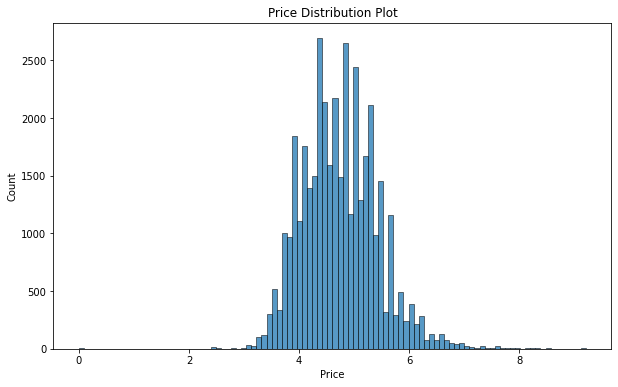

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(train['price'], bins=100)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Price Distribution Plot")

In [20]:
# 불필요한 컬럼 삭제
train = train.drop(['id', 'host_name', 'name', 'last_review'], axis=1)
test = test.drop(['id', 'host_name', 'name', 'last_review'], axis=1)

In [21]:
# 결측치 제거
train['reviews_per_month'] = train['reviews_per_month'].fillna(0)
test['reviews_per_month'] = test['reviews_per_month'].fillna(0)

In [22]:
# 결측치 확인
train.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [23]:
# 가격 값 복사
target = train['price']
train = train.drop('price', axis=1)

#### **피처 엔지니어링**

In [24]:
# 수치형 데이터와 범주형 데이터 분리
n_train = train.select_dtypes(exclude='object').copy()
c_train = train.select_dtypes(include='object').copy()

n_test = test.select_dtypes(exclude='object').copy()
c_test = test.select_dtypes(include='object').copy()

In [25]:
n_train.describe()

,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.911600e+04,39116.000000,39116.000000,39116.000000,39116.000000,39116.000000,39116.000000,39116.000000
mean,6.774143e+07,40.728848,-73.952125,6.990720,23.272855,1.091963,7.090756,112.980826
std,7.881383e+07,0.054499,0.046354,20.310323,44.589170,1.600772,32.661136,131.674306
min,2.438000e+03,40.499790,-74.244420,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.834978e+06,40.690038,-73.983190,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.070949e+07,40.723000,-73.955740,2.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.762943,-73.936338,5.000000,23.000000,1.590000,2.000000,228.000000
max,2.743213e+08,40.912340,-73.712990,1250.000000,629.000000,58.500000,327.000000,365.000000


In [26]:
# 수치형 변수
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
cols = [
        'host_id',
        'latitude',
        'longitude',
        'minimum_nights',
        'number_of_reviews', 
        'reviews_per_month',
        'calculated_host_listings_count',
        'availability_365'
        ]

display(n_train.head(1))
n_train[cols] = scaler.fit_transform(n_train[cols])
n_test[cols] = scaler.transform(n_test[cols])
display(n_train.head(1))

,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,94219511,40.80167,-73.95781,3,3,0.09,2,0


,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0.637654,1.079076,-0.044181,0.25,-0.090909,-0.180645,1.0,-0.197368


In [27]:
# 범주형 변수
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = [
        'neighbourhood_group',
        'neighbourhood',
        'room_type'
        ]

display(c_train.head(1))
for col in cols:
    c_train[col] = le.fit_transform(c_train[col])
    c_test[col] = le.transform(c_test[col])
display(c_train.head(1))

,neighbourhood_group,neighbourhood,room_type
0,Manhattan,Harlem,Private room


,neighbourhood_group,neighbourhood,room_type
0,2,94,1


In [28]:
# 분리한 데이터 다시 합침
train = pd.concat([n_train, c_train], axis=1)
test = pd.concat([n_test, c_test], axis=1)
print(train.shape, test.shape)
train.head()

(39116, 11) (9779, 11)


,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group,neighbourhood,room_type
0,0.637654,1.079076,-0.044181,0.25,-0.090909,-0.180645,1.0,-0.197368,2,94,1
1,0.183795,0.512585,-0.734646,0.00,2.681818,0.845161,1.0,0.951754,2,95,0
2,-0.303912,0.096153,-1.064618,14.50,-0.181818,-0.109677,0.0,-0.197368,2,209,0
3,-0.272411,-0.435087,0.410010,0.50,10.636364,1.625806,1.0,-0.192982,1,13,0
4,-0.183075,-0.466497,0.004055,6.50,-0.227273,-0.238710,0.0,-0.197368,1,13,1


### **4. 검증 데이터 분리**
#### **Train 데이터로 학습(훈련), Validation(검증용) 데이터로 예측**

In [29]:
# 검증 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=2022)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((31292, 11), (7824, 11), (31292,), (7824,))

### **5. 머신러닝**

XGBoost 모델이 가장 성능이 좋아 해당 모델을 사용하기로 했다.

In [30]:
# Xgboost
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

model = XGBRegressor(max_depth=10,
                     learning_rate=0.02,
                     n_estimators=500,
                     random_state=2022)

model.fit(X_train, y_train)
pred = model.predict(X_val)

pred = np.expm1(pred)
mean_squared_error(y_val, pred)

/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(


22284.670456832002

### **6. 채점**

In [31]:
# test 데이터 예측 및 평가
y_test = pd.read_csv('/aiffel/data/y_test.csv')

# Xgboost
pred = model.predict(test)

pred = np.expm1(pred)
mean_squared_error(y_test, pred)

42778.1334111504

---

### **프로젝트 회고**

이번 프로젝트는 유난히 시간이 오래 걸렸던 것 같다. 해당 노드에서 제공된 성능향상 Tip 영상을 이미 보고 나서 프로젝트를 진행하게 되어 직접 생각해볼 기회를 날린 것 같아 아쉬운 마음도 들었는데 영상에서 나온 점수보다 낮은 점수를 도출해낸다는 건 생각보다 쉬운 일이 아니었다. 고구마 백개 먹은 느낌이다,,, 사이다가 절실하다 🍠x100

**내가 시도해본 것들은 아래와 같다.**
1. 결측치 삭제
2. 좌측으로 몰려있는 피처 로그 변환
3. 상관관계가 약하다고 생각하는 피처 제거
4. test_size, random_state 변경
5. 다른 모델 사용 (LightGBM, CatBoost)
6. 정규화 대신 표준화 진행 (MinMaxScaler -> StandardScaler/RobustScaler)
7. 다른 인코딩 방식 사용 (Label -> One-hot/dummies)
8. XGBoost 최적의 하이퍼파라미터로 변경 (Randomized Search)

1, 2, 3, 4, 7번 -> 성능이 더 안 좋아짐 (MSE 점수가 높아졌다)
<br>5, 6번 -> 성능에 거의 차이가 없음
<br>8번 -> 시간이 너무 오래 걸림

원핫(One-hot) 인코딩을 사용하면 성능이 더 좋아질 줄 알았는데 데이터프레임의 피처 수가 급격히 늘어나게 되면서 아마 과적합 문제가 발생해 모델 성능이 저하된 건 아닐까 싶다. 또한 그리드 서치(Grid Search)보다 빠르고 효율적인 방법으로 알려진 랜덤 서치(Randomized Search)를 이용해서 최적의 하이퍼파라미터를 찾아 변경을 시도해봤지만, 이 역시 최종 MSE 점수에는 큰 도움이 되지 못 하여 매우 실망스러웠다. 원핫 인코딩과 랜덤 서치 둘 다 LMS 클라우드에서는 너무 오래 걸려 로컬에서 실행을 할 수 밖에 없었다. 비록 점수에는 도움이 되지 않았지만, 덕분에 XGBoost의 하이퍼파라미터에는 어떤 것들이 있는지 알게 되었고 이것저것 많이 시도해보면서 지금까지 배운 것들을 복습해볼 수 있는 좋은 기회였던 것 같다. 일단 피처들 간에 강한 관계가 보이지 않아 피처들 간의 상호작용을 파악하는 데에 어려움이 있었고 하나하나 시각화를 진행해보았지만 아직까지는 해결책을 도출하는 부분에 있어 어려움이 있는 것 같아 많은 실습을 통해 데이터 문해력을 키워야겠다는 생각이 강하게 들었다. 그리고 다음 프로젝트부터는 무조건 로컬 환경에서 해야겠다!

#### **새로 알게 된 것!**
* display(): 데이터프레임을 표 형식으로 표시
* np.expm1(): 각 요소에 자연상수를 밑으로 하는 지수함수를 적용한 뒤 1을 뺀 것
* bins: 히스토그램의 가로축 구간의 개수를 지정
* palette: seaborn에서 색상 조합을 지정할 때 사용 (기본 팔레트는 총 6가지 색상 제공)
* tight_layout(): axes 사이 간격을 적절하게 조정

**transform()과 fit_transform()의 차이는 무엇일까?** 🤔
* transform(): 학습된 모델을 사용하여 새로운 데이터를 변환하는 역할을 한다.
* fit_transform(): 모델에 데이터를 학습하고, 변환하는 역할을 한다.

모델은 train 데이터에 있는 mean(평균)과 variance(분산)를 학습하게 되는데 이렇게 학습된 Scaler()의 파라미터는 test 데이터를 scale하는데 사용된다. 그런데 fit_transform을 test 데이터에도 적용하게 된다면 test 데이터로부터 새로운 평균과 분산 값을 얻게 되어 학습을 하게 되므로 fit_transform을 test 데이터에도 하게 된다면 모델의 성능을 평가할 수 없게 된다.

#### **참고한 레퍼런스**
<br>XGboost 주요 하이퍼파라미터 (with 파이썬) https://zzinnam.tistory.com/entry/XGboost-%EC%A3%BC%EC%9A%94-%ED%95%98%EC%9D%B4%ED%8D%BC%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0-with-%ED%8C%8C%EC%9D%B4%EC%8D%AC
<br>XGBoost 파라미터 조정(튜닝) https://zzinnam.tistory.com/entry/XGBoost-%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0-%EC%A1%B0%EC%A0%95%ED%8A%9C%EB%8B%9D
<br>딥러닝 모델 성능 개선하는 법 (캐글 Tip!) https://facerain.club/improve-dl-performance/
<br>8 Ways to Improve Accuracy of Machine Learning Models (Updated 2023) https://www.analyticsvidhya.com/blog/2015/12/improve-machine-learning-results/
<br>New York City Airbnb Open Data https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data
<br>[scikit-learn] transform()과 fit_transform()의 차이는 무엇일까? https://deepinsight.tistory.com/165